In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

### Import Libraries

In [4]:
ticker = 'INDF.JK'
data = yf.download(ticker, start='2015-01-01', end='2023-01-01')
data = data[['Close']]

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


### Fetch Stock Data

In [7]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

### Normalize the Data

In [10]:
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

### Create Dataset for Training & Testing

In [13]:
train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size
train_data, test_data = scaled_data[0:train_size, :], scaled_data[train_size:len(scaled_data), :]

### Split Data into Training & Testing Sets

In [16]:
time_step = 60  
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

### Prepare Training & Testing Data

In [19]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

C:\Users\ivanf\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Build the LSTM Model

In [22]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=64, epochs=20, verbose=1)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.1391
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0065
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0054
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0040
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0042
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0039
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0032
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0037
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0033
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0033
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0032
Epoch 12/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0032
Epoch 13/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0030
Epoch 14/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0027
Epoch 15/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0033
Epoc

### Compile & Train the Model

In [25]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


### Make Predictions

In [40]:
years_to_predict = 3
future_steps = 1095
last_data = scaled_data[-time_step:]
predictions = []

for _ in range(future_steps):
    input_data = last_data.reshape(1, time_step, 1)
    pred = model.predict(input_data)[0][0]
    predictions.append(pred)
    last_data = np.append(last_data[1:], pred).reshape(time_step, 1)

predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))
future_dates = pd.date_range(start=data.index[-1], periods=future_steps + 1)[1:]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━

### Predict Next 3 Year (1095 Days)

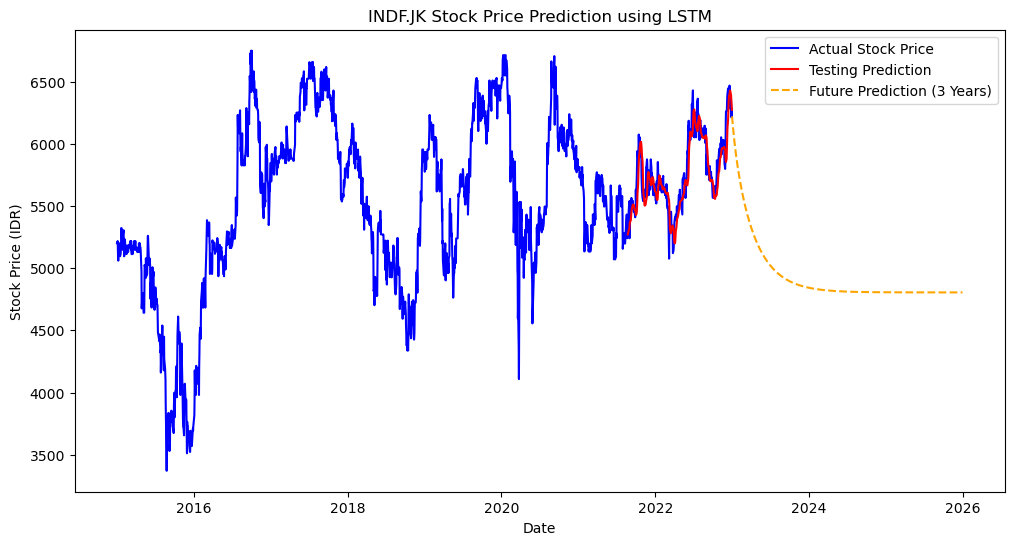

In [43]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, scaler.inverse_transform(scaled_data), label='Actual Stock Price', color='blue')
plt.plot(data.index[-len(test_predict):], test_predict, label='Testing Prediction', color='red')
plt.plot(future_dates, predictions, label=f'Future Prediction ({years_to_predict} Years)', color='orange', linestyle='dashed')

plt.xlabel('Date')
plt.ylabel('Stock Price (IDR)')
plt.title(f'{ticker} Stock Price Prediction using LSTM')
plt.legend()
plt.show()

### Plot The Result